# Imports

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import zipfile as zf
import re

# Utility

In [4]:
def extract(path, filename):
    archive = zf.ZipFile(path)
    file = archive.open(filename)
    return file

In [5]:
def find_languages(list):
    languages = []
    for response in list:
        temp_languages = re.findall('[^;]+', response)
        for language in temp_languages:
            languages.append(language)
    return languages

# Usage

## Counting Data

In [8]:
dicts = []
for i in range(2019, 2024):
    df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
    languages = []
    if i in range(2019, 2021):
        df = df['LanguageWorkedWith']
    else:
        df = df['LanguageHaveWorkedWith']
    for language in find_languages(df.fillna('').tolist()):
        languages.append(language)
        
    language_counts = list(set(languages))
    language_counts = dict.fromkeys(languages)
    for key in language_counts:
        language_counts[key] = 0
        
    for key in language_counts:    
        for language in languages:
            if language == key:
                language_counts[key] += 1
                
    dicts.append(language_counts)

In [9]:
respondant_counts = list()
for i in range(2019, 2024):
    df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
    respondant_counts.append(df.shape[0])

In [10]:
years = list(range(2019,2024))

## Plotting

In [12]:
c_sharp_users = []
for i in range(5):
    c_sharp_users.append(dicts[i]['C#']/respondant_counts[i])
c_plus_plus_users = []
for i in range(5):
    c_plus_plus_users.append(dicts[i]['C++']/respondant_counts[i])
c_users = []
for i in range(5):
    c_users.append(dicts[i]['C']/respondant_counts[i])
javascript_users = []
for i in range(5):
    javascript_users.append(dicts[i]['JavaScript']/respondant_counts[i])
rust_users = []
for i in range(5):
    rust_users.append(dicts[i]['Rust']/respondant_counts[i])
python_users = []
for i in range(5):
    python_users.append(dicts[i]['Python']/respondant_counts[i])

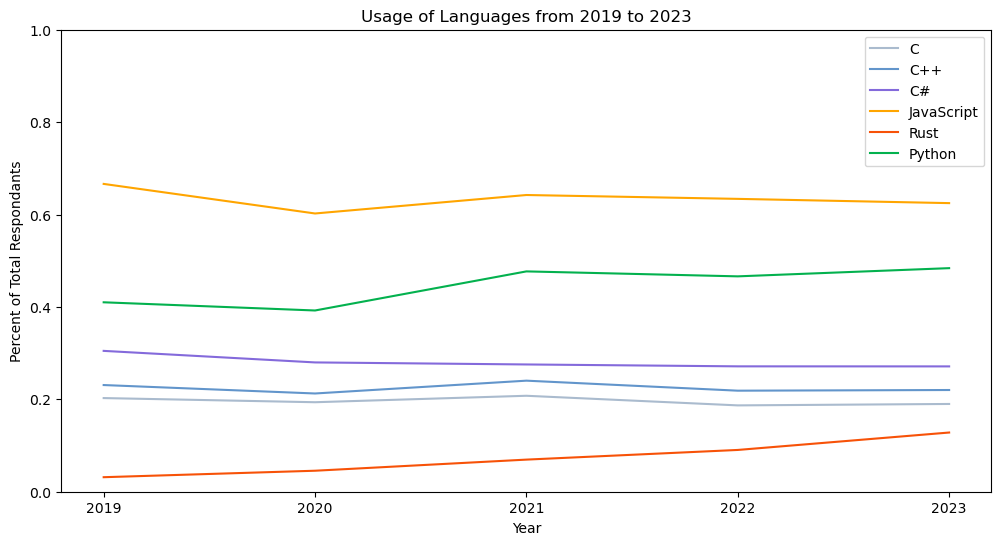

In [13]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(years, c_users, label='C', color='#aabbce')
ax.plot(years, c_plus_plus_users, label='C++', color='#6295cb')
ax.plot(years, c_sharp_users, label='C#', color='#846adb')
ax.plot(years, javascript_users, label='JavaScript', color='orange')
ax.plot(years, rust_users, label='Rust', color='#f75208')
ax.plot(years, python_users, label='Python', color='#03b14e')

ax.set_title('Usage of Languages from 2019 to 2023')
ax.set_xlabel('Year')
ax.set_ylabel('Percent of Total Respondants')
ax.set_ylim(0, 1)
ax.set_xticks(years)

ax.legend()
plt.show()

## Prediction

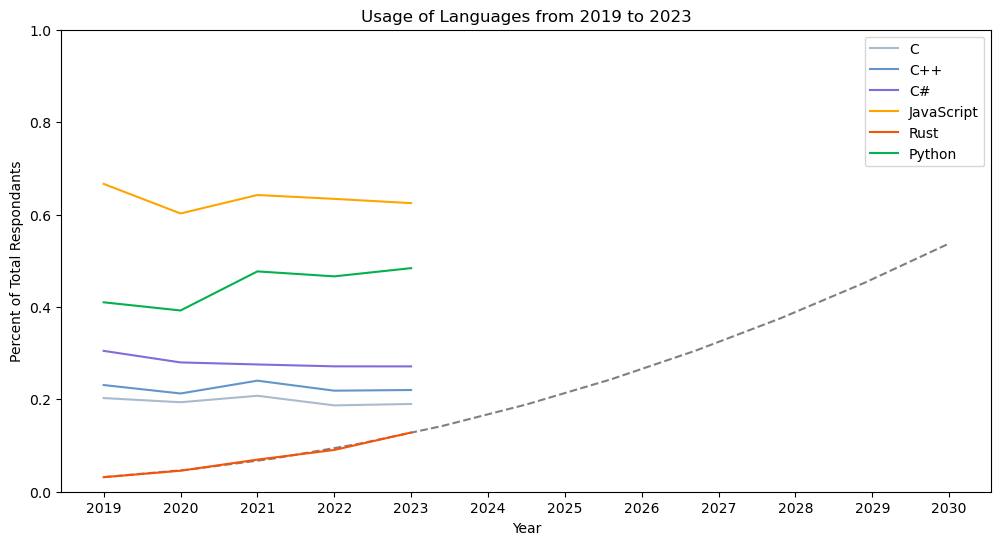

In [15]:
coefficients = np.polyfit(years, rust_users, 2)
polynomial = np.poly1d(coefficients)

x_vals = np.linspace(min(years), max(years)+7, 11)
y_vals = polynomial(x_vals)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(x_vals, y_vals, '--', color='grey')

ax.plot(years, c_users, label='C', color='#aabbce')
ax.plot(years, c_plus_plus_users, label='C++', color='#6295cb')
ax.plot(years, c_sharp_users, label='C#', color='#846adb')
ax.plot(years, javascript_users, label='JavaScript', color='orange')
ax.plot(years, rust_users, label='Rust', color='#f75208')
ax.plot(years, python_users, label='Python', color='#03b14e')

ax.set_title('Usage of Languages from 2019 to 2023')
ax.set_xlabel('Year')
ax.set_ylabel('Percent of Total Respondants')
ax.set_ylim(0, 1)
ax.set_xticks(years+[2024, 2025, 2026, 2027, 2028, 2029, 2030])

ax.legend()
plt.show()

# Desire

## Counting Data

In [18]:
dicts = []
for i in range(2019, 2024):
    df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
    languages = []
    if i in range(2019, 2021):
        df = df['LanguageDesireNextYear']
    else:
        df = df['LanguageWantToWorkWith']
    for language in find_languages(df.fillna('').tolist()):
        languages.append(language)
    language_counts = list(set(languages))
    language_counts = dict.fromkeys(languages)
    for key in language_counts:
        language_counts[key] = 0
    for key in language_counts:    
        for language in languages:
            if language == key:
                language_counts[key] += 1
    dicts.append(language_counts)

## Plotting

In [20]:
desired_c_sharp_users = []
desired_c_plus_plus_users = []
desired_c_users = []
desired_javascript_users = []
desired_rust_users = []
desired_python_users = []
for i in range(5):
    desired_c_sharp_users.append(dicts[i]['C#']/respondant_counts[i])
    desired_c_plus_plus_users.append(dicts[i]['C++']/respondant_counts[i])
    desired_c_users.append(dicts[i]['C']/respondant_counts[i])
    desired_javascript_users.append(dicts[i]['JavaScript']/respondant_counts[i])
    desired_rust_users.append(dicts[i]['Rust']/respondant_counts[i])
    desired_python_users.append(dicts[i]['Python']/respondant_counts[i])

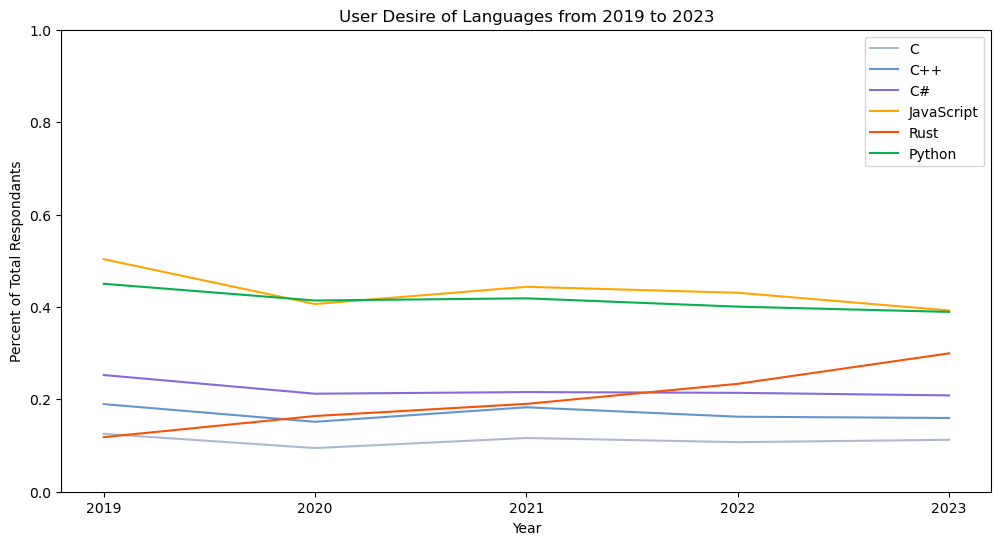

In [21]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(years, desired_c_users, label='C', color='#aabbce')
ax.plot(years, desired_c_plus_plus_users, label='C++', color='#6295cb')
ax.plot(years, desired_c_sharp_users, label='C#', color='#846adb')
ax.plot(years, desired_javascript_users, label='JavaScript', color='orange')
ax.plot(years, desired_rust_users, label='Rust', color='#f75208')
ax.plot(years, desired_python_users, label='Python', color='#03b14e')

ax.set_title('User Desire of Languages from 2019 to 2023')
ax.set_xlabel('Year')
ax.set_ylabel('Percent of Total Respondants')
ax.set_ylim(0, 1)
ax.set_xticks(years)
ax.legend(loc=1)

plt.show()

## Prediction

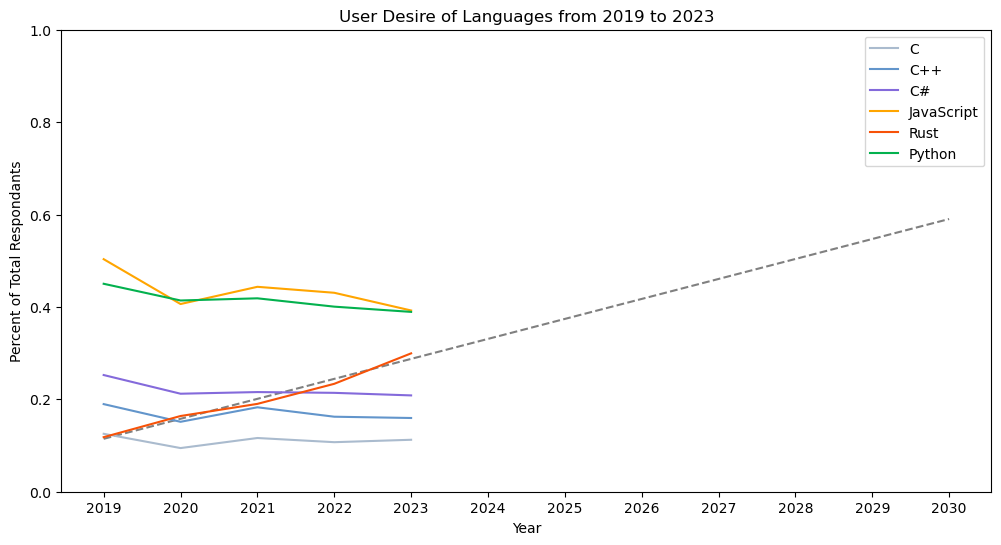

In [23]:
coefficients = np.polyfit(years, desired_rust_users, 1)
polynomial = np.poly1d(coefficients)

x_vals = np.linspace(min(years), max(years)+7, 12)
y_vals = polynomial(x_vals)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(x_vals, y_vals, '--', color='grey')

ax.plot(years, desired_c_users, label='C', color='#aabbce')
ax.plot(years, desired_c_plus_plus_users, label='C++', color='#6295cb')
ax.plot(years, desired_c_sharp_users, label='C#', color='#846adb')
ax.plot(years, desired_javascript_users, label='JavaScript', color='orange')
ax.plot(years, desired_rust_users, label='Rust', color='#f75208')
ax.plot(years, desired_python_users, label='Python', color='#03b14e')

ax.set_title('User Desire of Languages from 2019 to 2023')
ax.set_xlabel('Year')
ax.set_ylabel('Percent of Total Respondants')
ax.set_ylim(0, 1)
ax.set_xticks(years+[2024, 2025, 2026, 2027, 2028, 2029, 2030])
ax.legend(loc=1)

plt.show()

# Salaries

## Abstracting

In [38]:
def find_average_us_salary(language):
    pays = []
    for i in range(2019, 2024):
        if i in range(2019, 2021):pays = []
    for i in range(2019, 2024):
        if i in range(2019, 2021):
            column_name = 'LanguageWorkedWith'
        else:
            column_name = 'LanguageHaveWorkedWith'
        df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
        df[column_name] = df[column_name].fillna('')
        df['Country'] = df['Country'].fillna('')
        df['CompTotal'] = df['CompTotal'].fillna(0)
        df = df[df['Country'].str.contains('United States')]
        df = df[[column_name, 'CompTotal']]
        for row in range(df.shape[0]):
            if language in df.iloc[row, 0].split(';'):
                pays.append(df.iloc[row, 1])
    count = pays.count(0)
    for i in range(count):
        pays.remove(0)
    for pay in pays:
        if pay > 1000000:
            pays.remove(pay)
    return np.average(pays)

## Counting Data

In [40]:
pays = []
for i in range(2019, 2024):
    if i in range(2019, 2021):
        column_name = 'LanguageWorkedWith'
    else:
        column_name = 'LanguageHaveWorkedWith'
    df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
    df[column_name] = df[column_name].fillna('')
    df['CompTotal'] = df['CompTotal'].fillna(0)
    df = df[df[column_name].str.contains('Rust')]
    df = df[df['Country'].str.contains('United States')]
    for pay in df['CompTotal'].tolist():
        pays.append(pay)
count = pays.count(0)
for i in range(count):
    pays.remove(0)
for pay in pays:
    if pay > 1000000:
        pays.remove(pay)

## Plotting

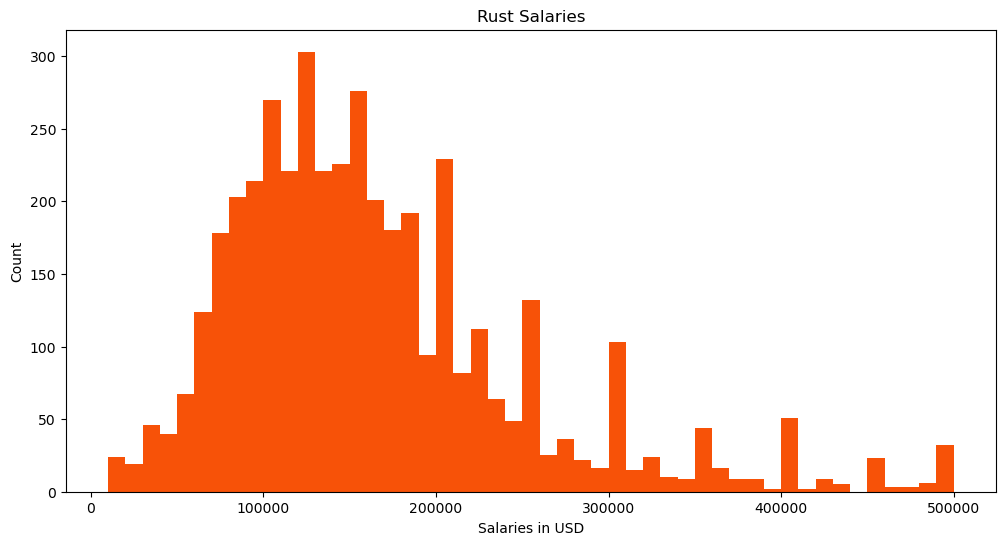

In [41]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
bins = []
for i in range(50):
    bins.append((i+1) * 10000)
ax.hist(pays, bins=bins, color='#f75208')
ax.set_xlabel('Salaries in USD')
ax.set_ylabel('Count')
ax.set_title('Rust Salaries')
plt.show()

In [42]:
languages = ['C', 'C++', 'C#', 'JavaScript', 'Rust', 'Python']
avg_salaries = []
for language in languages:
    avg_salaries.append(find_average_us_salary(language))

In [45]:
colors = ['#aabbce', '#6295cb', '#846adb', 'orange', '#f75208', '#03b14e']

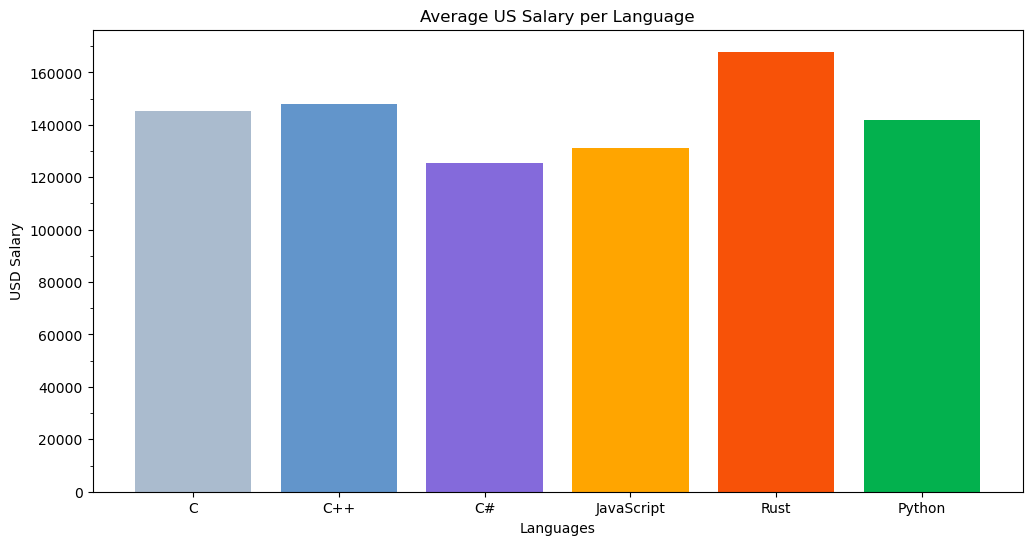

In [46]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.bar(languages, avg_salaries, color=colors)
ax.set_xlabel('Languages')
ax.set_ylabel('USD Salary')
ax.set_title('Average US Salary per Language')
ax.yaxis.set_major_locator(ticker.MultipleLocator(20000))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10000))
plt.show()

# Admiration

In [82]:
def admire_user_counts(language):
    admire_counts = []
    user_counts = []
    for i in range(2019, 2024):
        df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
        if i in range(2019, 2021):
            column_name = 'LanguageWorkedWith'
            desire_column_name = 'LanguageDesireNextYear'
        else:
            column_name = 'LanguageHaveWorkedWith'
            desire_column_name = 'LanguageWantToWorkWith'
        df = df[[column_name, desire_column_name]].fillna('')
        user_count = 0
        admire_count = 0
        for row in range(df.shape[0]):
            if language in df.iloc[row, 0].split(';'):
                user_count += 1
                if language in df.iloc[row, 1].split(';'):
                    admire_count += 1
        user_counts.append(user_count)
        admire_counts.append(admire_count)
    counts = []
    counts.append(admire_counts)
    counts.append(user_counts)
    return counts

In [84]:
c_counts = admire_user_counts("C")
cpp_counts = admire_user_counts("C++")
csharp_counts = admire_user_counts("C#")
rust_counts = admire_user_counts("Rust")
javascript_counts = admire_user_counts("JavaScript")
python_counts = admire_user_counts("Python")
normalized_c_admire_counts = []
normalized_cpp_admire_counts = []
normalized_csharp_admire_counts = []
normalized_rust_admire_counts = []
normalized_javascript_admire_counts = []
normalized_python_admire_counts = []
for i in range(5):
    normalized_c_admire_counts.append(c_counts[0][i]/c_counts[1][i])
    normalized_cpp_admire_counts.append(cpp_counts[0][i]/cpp_counts[1][i])
    normalized_csharp_admire_counts.append(csharp_counts[0][i]/csharp_counts[1][i])
    normalized_rust_admire_counts.append(rust_counts[0][i]/rust_counts[1][i])
    normalized_javascript_admire_counts.append(javascript_counts[0][i]/javascript_counts[1][i])
    normalized_python_admire_counts.append(python_counts[0][i]/python_counts[1][i])

## Plotting

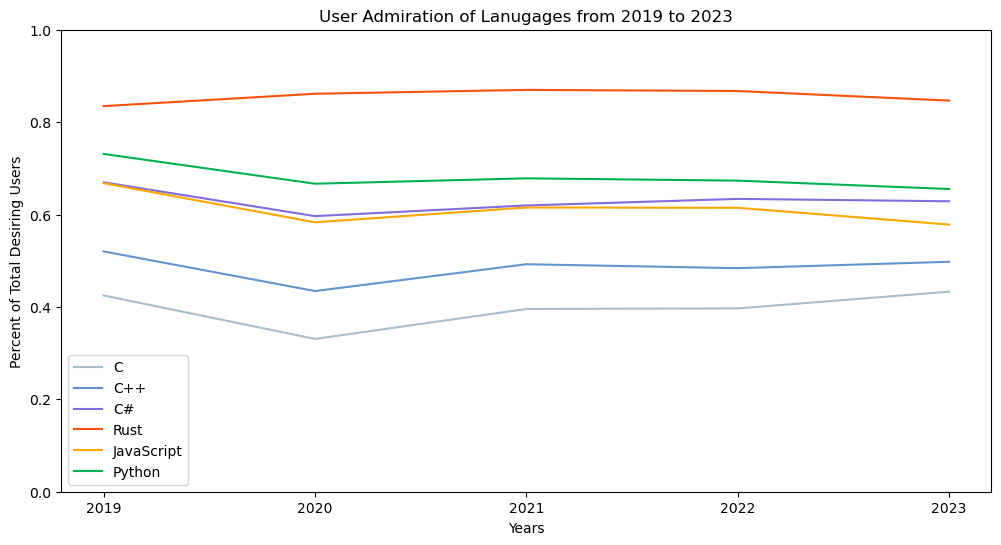

In [85]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.plot(years, normalized_c_admire_counts, label="C", color='#aabbce')
ax.plot(years, normalized_cpp_admire_counts, label="C++", color='#6295cb')
ax.plot(years, normalized_csharp_admire_counts, label="C#", color='#846adb')
ax.plot(years, normalized_rust_admire_counts, label='Rust', color='#f75208')
ax.plot(years, normalized_javascript_admire_counts, label='JavaScript', color='orange')
ax.plot(years, normalized_python_admire_counts, label='Python', color='#03b14e')
ax.set_xlabel('Years')
ax.set_ylabel('Percent of Total Desiring Users')
ax.set_title('User Admiration of Lanugages from 2019 to 2023')
ax.set_xticks(years)
ax.set_ylim(0, 1)
ax.legend()
plt.show()